# EDA - Analyse exploratoire des données

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Charger les données
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [8]:
df = pd.read_csv(url)

data = df.copy()

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Count the number of missing values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Questions :
 - Comment imputer les données manquantes ?

# EDA

Comprendre et analyser les variables 

## Analyser qui a survécu

### Proportion hommes/femmes

In [38]:
# Man et woman survival rate
female = df.loc[df.Sex == 'female']["Survived"]
survival_rate_female = sum(female)/len(female)

male = df.loc[df.Sex == 'male']["Survived"]
survival_rate_male = sum(male)/len(male)

In [39]:
rate_female = len(female)/len(df)
rate_male = len(male)/len(df)

In [40]:
print(f"Le taux de femmes sur le Titanic est de {rate_female}%")
print(f"Le taux d'hommes sur le Titanic  est de {rate_male}%")

print(f"\nLe taux de survie des femmes est de {survival_rate_female}%")
print(f"Le taux de survie des homme est de {survival_rate_male}%")

Le taux de femmes sur le Titanic est de 0.35241301907968575%
Le taux d'hommes sur le Titanic  est de 0.6475869809203143%

Le taux de survie des femmes est de 0.7420382165605095%
Le taux de survie des homme est de 0.18890814558058924%


### Proportion classes

In [41]:
# Class survival rate
class1 = df.loc[df.Pclass == 1]["Survived"]
class2 = df.loc[df.Pclass == 2]["Survived"]
class3 = df.loc[df.Pclass == 3]["Survived"]

survival_rate_class1 = sum(class1)/len(class1)
survival_rate_class2 = sum(class2)/len(class2)
survival_rate_class3 = sum(class3)/len(class3)

print(f"Le taux de survie des passagers de la classe 1 est de {survival_rate_class1}%")
print(f"Le taux de survie des passagers de la classe 2 est de {survival_rate_class2}%")
print(f"Le taux de survie des passagers de la classe 3 est de {survival_rate_class3}%")


Le taux de survie des passagers de la classe 1 est de 0.6296296296296297%
Le taux de survie des passagers de la classe 2 est de 0.47282608695652173%
Le taux de survie des passagers de la classe 3 est de 0.24236252545824846%


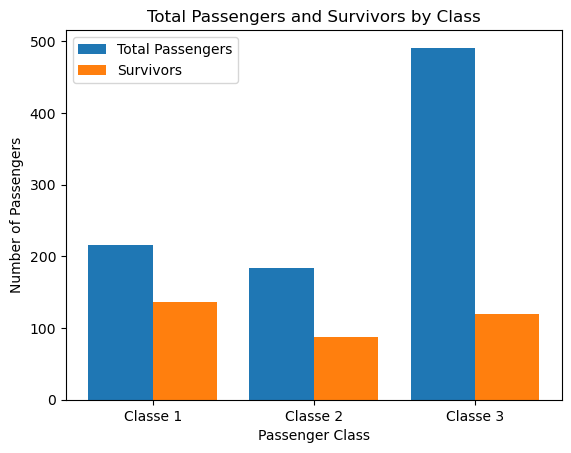

In [48]:
# Data for plotting
labels = ['Classe 1', 'Classe 2', 'Classe 3']
total_passengers = [len(class1), len(class2), len(class3)]
survived_passengers = [sum(class1), sum(class2), sum(class3)]

x = np.arange(len(labels))  # Label locations
width = 0.4  # Bar width

# Creating the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, total_passengers, width, label='Total Passengers')
bars2 = ax.bar(x + width/2, survived_passengers, width, label='Survivors')

# Labels and title
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Total Passengers and Survivors by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Fare and survival

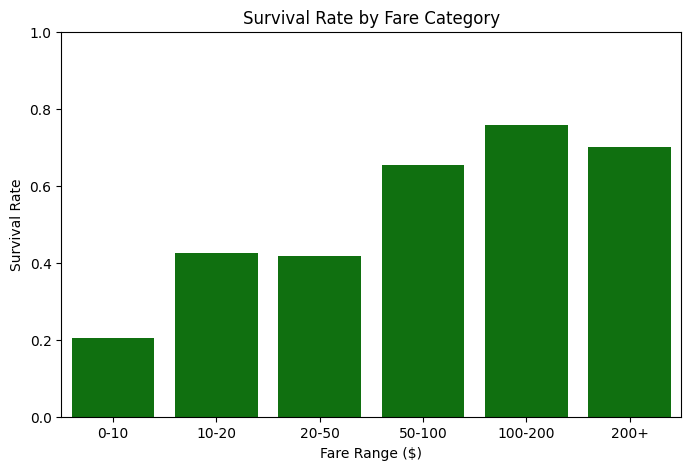

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create fare bins
fare_bins = [0, 10, 20, 50, 100, 200, 600]  # Adjust bins as needed
fare_labels = ["0-10", "10-20", "20-50", "50-100", "100-200", "200+"]

data["Fare_Binned"] = pd.cut(data["Fare"], bins=fare_bins, labels=fare_labels)

# Compute survival rate per fare bin
survival_rate = data.groupby("Fare_Binned")["Survived"].mean()  # Mean gives the survival rate (1 = survived, 0 = not)

# Plot survival rate
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate.index, y=survival_rate.values, color="green")

# Labels and title
plt.xlabel("Fare Range ($)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Fare Category")
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.show()


Plus le coût du ticket est élevé plus la taux de survie augmente

### Age distribution

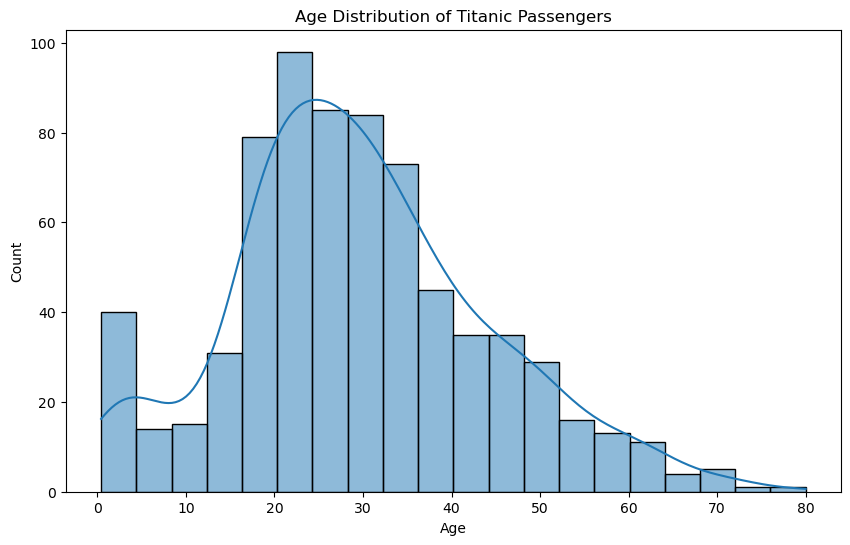

In [29]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


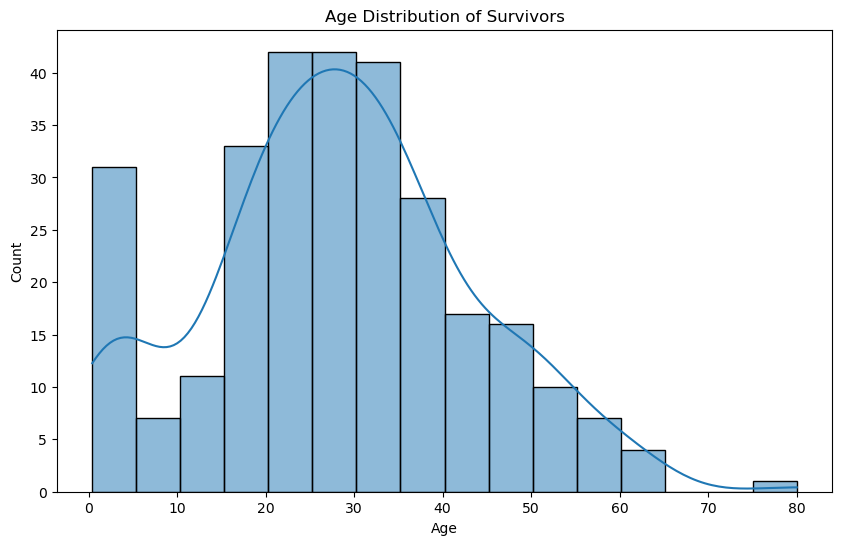

In [31]:
# Age distribution of survivors
plt.figure(figsize=(10, 6))
sns.histplot(df[df.Survived == 1]["Age"], kde=True)
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Pas de corrélation évidente entre l'age et la survie

### Embarked

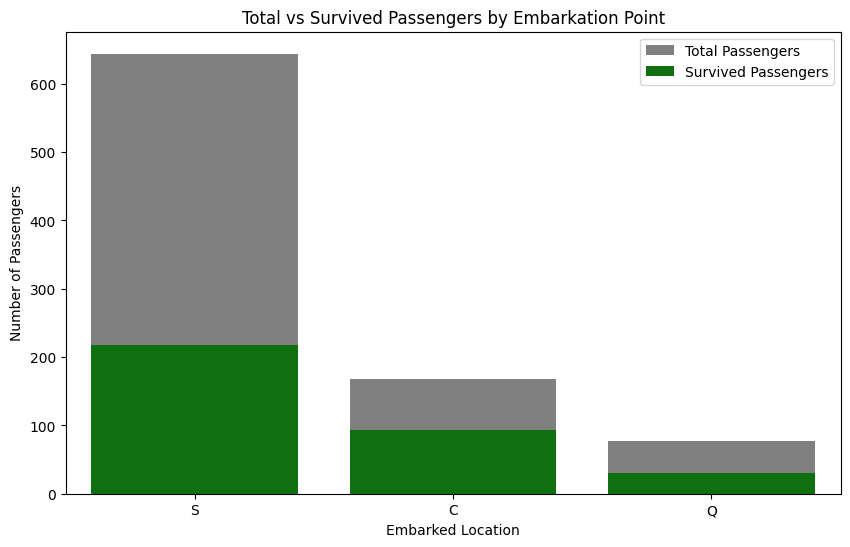

In [18]:
# Embarked number vs survival rate
total_embarked = df["Embarked"].value_counts()

survived_embarked = data[data["Survived"] == 1]["Embarked"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_embarked.index, y=total_embarked.values, color="gray", label="Total Passengers")
sns.barplot(x=survived_embarked.index, y=survived_embarked.values, color="green", label="Survived Passengers")

# Labels and title
plt.xlabel("Embarked Location")
plt.ylabel("Number of Passengers")
plt.title("Total vs Survived Passengers by Embarkation Point")
plt.legend()
plt.show()

Points d'embarquement S avec un taux de survie plus élevé

## Correlation entre les variables

In [27]:
# Impute categorical variables
# Sexe
data["Sex"] = data["Sex"].map({"female": 0, "male": 1})

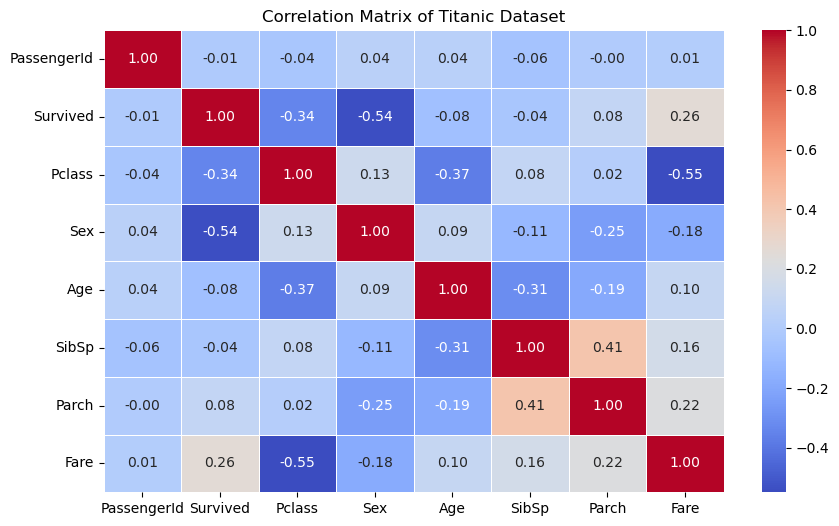

In [28]:
# Compute correlation matrix
corr_matrix = data[data.select_dtypes(exclude="object").columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()

**Highest correlations** :
- Fare et Pclass
- Survived et Sex
- Survived et Pclass
- Survived et Fare

Femme en classe 1 (prix elevé) avec une forte probabilité de survie